# Classificação de Sentimentos com SVM

Este notebook demonstra a aplicação de técnicas clássicas de Processamento de Linguagem Natural (NLP) para realizar a **classificação de sentimentos** em frases utilizando o modelo **SVM (Support Vector Machine)**.

Serão utilizados dois vetorizadores de texto:
- **Bag of Words (BoW)**
- **TF-IDF (Term Frequency-Inverse Document Frequency)**

E compararemos seus desempenhos na tarefa de classificar frases em **positivo** ou **negativo**.


### 1. Importações e Configuração Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

## 2. Carregamento dos Dados

Utilizaremos um conjunto de frases sintéticas, criadas para representar sentimentos positivos e negativos. Esse dataset contém frases simples e claras com uma coluna de **texto** e outra com a **classe alvo** (`sentimento`).

In [25]:
df = pd.read_csv("data/frases_sentimentos.csv")
df.head()

,texto,sentimento
0,Não compraria novamente,negativo
1,Chegou danificado,negativo
2,Experiência ruim,negativo
3,Perfeito para o que eu precisava,positivo
4,Tudo certo com a entrega,positivo


## 3. Pré-processamento

As frases foram pré-processadas com:
- Conversão para minúsculas
- Remoção de pontuações
- Remoção de acentos

Esse tipo de limpeza ajuda a reduzir a dimensionalidade e melhorar a qualidade da vetorização textual.

## 4. Separação dos Dados

Dividimos os dados em **conjunto de treino** e **conjunto de teste**, mantendo o balanceamento entre as classes com o parâmetro `stratify`.

- **80% para treino**
- **20% para teste**

In [26]:
X = df['texto']
y = df['sentimento']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Vetorização - Bag of Words

Transformamos as frases em vetores numéricos utilizando o método **Bag of Words**, que conta a frequência de palavras em cada frase.

In [19]:
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

svm_bow = LinearSVC()
svm_bow.fit(X_train_bow, y_train)
y_pred_bow = svm_bow.predict(X_test_bow)

## 6. Treinamento com SVM (BoW)

Treinamos um classificador **SVM (Support Vector Machine)** com os vetores de BoW. Em seguida, avaliamos o modelo com métricas de classificação como acurácia, precisão, recall e f1-score.

In [27]:
print("Acurácia (BoW):", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

Acurácia (BoW): 0.9
              precision    recall  f1-score   support

    negativo       0.90      0.90      0.90        10
    positivo       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



## 7. Vetorização - TF-IDF

Aplicamos agora a vetorização com **TF-IDF**, que pondera as palavras pela frequência nos documentos e penaliza termos muito comuns.

In [21]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

## 8. Treinamento com SVM (TF-IDF)

Treinamos o mesmo modelo **SVM**, mas agora com os vetores gerados por TF-IDF. A performance é novamente avaliada com as mesmas métricas.

In [28]:
print("Acurácia (TF-IDF):", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

Acurácia (TF-IDF): 0.9
              precision    recall  f1-score   support

    negativo       0.90      0.90      0.90        10
    positivo       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



## 9. Avaliação Comparativa BoW vs TF-IDF

Comparamos o desempenho dos dois modelos — um treinado com BoW e outro com TF-IDF — para verificar se há diferença significativa de acurácia.

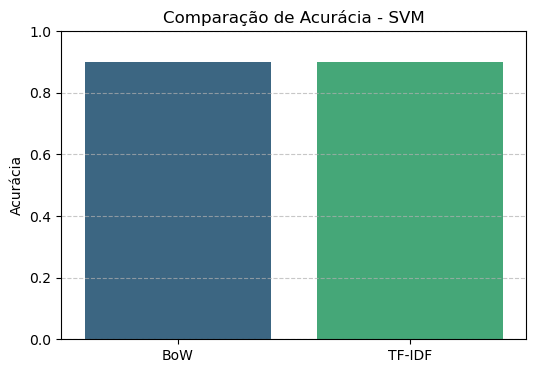

In [29]:
acc_bow = accuracy_score(y_test, y_pred_bow)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

plt.figure(figsize=(6, 4))
sns.barplot(x=["BoW", "TF-IDF"], y=[acc_bow, acc_tfidf], hue=["BoW", "TF-IDF"], palette="viridis", legend=False)
plt.title("Comparação de Acurácia - SVM")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Conclusão

Neste experimento, treinamos dois modelos SVM para classificar sentimentos em frases curtas, utilizando diferentes representações de texto:

- **SVM com BoW**: obteve acurácia de **90%**
- **SVM com TF-IDF**: também obteve acurácia de **90%**

### Observações:
- O dataset é pequeno e sintético, mas permite uma boa demonstração dos conceitos de vetorização e classificação.
- Ambos os vetorizadores apresentaram o mesmo desempenho, mas em bases reais e mais complexas, o **TF-IDF** tende a ser mais robusto.
- O modelo **SVM** se mostrou eficiente mesmo com um número pequeno de amostras e boa separação entre as classes.

Este notebook serve como uma base clara para projetos maiores de classificação de sentimentos em português, podendo ser facilmente adaptado para outros contextos e modelos.
